**Step-1:**
Lets Import the numpy!!

In [755]:
import numpy as np

**Step-2:**
Layers Need!!

In [756]:
#lets make 2 input layers, 5 dense layer and 1 output layer

input_layer=2
dense_layers=5
ouput_layers=1


**Step-3:** Give The Weights And Bias To The Layers

We Basically Need 2 Weights and 2 Bias. One is for input layer (Helps For Forward propagation) and another one is for output layer (Helps For backward propagation)

In [757]:
#weights giving randomly from input layers to dense layers (Forward)
weight_input_dense= np.random.uniform(size=(input_layer,dense_layers))


#weights giving randomly from output layers to dense layers (backward)
weight_output_dense= np.random.uniform(size=(ouput_layers,dense_layers))

In [758]:
#Bias for dense
weight_output_dense = np.random.uniform(size=(5, 1)) 


#Bias for output
Bias_output = np.random.uniform(size=(1, 1)) 

After Initializing the random weights and bias to the layers

**Step-4:**

Create the activation Functions

In [759]:
# Sigmoid Activation Function
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# tanh Activation Function
def tanh(x):
    return 2/( 1 + np.exp(2*x) - 1 )

# relu Activation Function
def relu(x):
    return np.maximum(0,x)

# softmax Activation Function
def soft_max(x):
    ex = np.exp(x - np.max(x))
    return ex / ex.sum(axis=0)

# PReLu Activation Function
def PReLu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

# Elu Activation Function
def Elu(x, alpha=1.0):
    return np.where(x>0 ,x ,alpha*(np.exp(x) - 1))

# GElu Activation Function
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x ** 3)))

# Swish Activation Function
def swish(x):
    return x / (1 + np.exp(-x))

# SElu Activation Function
def SElu(x, scale=1.6732632423543772, alpha=1.0507009873554805):
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))

# SoftPlus Activation Function
def Soft_plus(x):
    return np.log(1 + np.exp(x))

# Mish Activation Function
def Mish(x):
    return x * np.tanh( np.log1p(np.exp(x)))

# Hard Swish Activation Function
def Hard_Swish(x):
    return x * np.clip((x + 3) / 6, 0, 1)

# Hard tanh Activation Function
def Hard_tanh(x):
    return np.clip(x, -1, 1)

# Hard Softmax Activation Function
def Hard_Softmax(x):
    ex = np.exp(x - np.max(x))  # This is for numerical stability!!BTW
    return (ex / ex.sum(axis=0)).clip(0, 1)

# Hard Sigmoid Activation Function
def Hard_Sigmoid(x):
    return np.clip((x + 1) / 2, 0, 1)

# tanh Shrink Activation Function
def tanh_Shrink(x):
    return x - np.tanh(x)

# Hard Shrink Activation Function
def Hard_Shrink(x, lambd=0.5):
    return np.where(np.abs(x) < lambd, 0, x)

# Soft Shrink  Activation Function
def Soft_Shrink(x,lambd=0.5):
    return np.where(x > lambd, x - lambd, np.where(x < -lambd, x + lambd, 0))

**Step-5:** Forward Propagation (input layer to output layer)

In [760]:
def forward_propagation(input_data):

    #for dense layer
    z_dense=np.dot(input_data,weight_input_dense)+Bias_dense #Here dot is helps to calculate the sum of products of the vectors
    a_dense=sigmoid(z_dense) #Applying the Activation Function To The Dense Layer

    #for an output layer 
    z_output=np.dot(a_dense,weight_output_dense)+Bias_output
    output=sigmoid(z_output) #Applying Activation Function To the output (Output maybe in between o to 1 in this case)

    return a_dense,output

**Step-6:**
Lets Make Loss Functions

In [761]:
# Mean Bias Error
def mean_bias_error(y_true, y_pred):
    return np.mean(y_pred - y_true)

# Mean Absolute Error
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

# Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

# Root Mean Squared Error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Huber Loss
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_pred - y_true
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error ** 2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

# Log Cosh Loss
def log_cosh_loss(y_true, y_pred):
    return np.mean(np.log(np.cosh(y_pred - y_true)))

# Binary Cross-Entropy (BCE)
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # To avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predictions
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Hinge Loss
def hinge_loss(y_true, y_pred):
    return np.mean(np.maximum(0, 1 - y_true * y_pred))

# Cross-Entropy Loss
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # To avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predictions
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# Kullback-Leibler Divergence
def kl_divergence(y_true, y_pred):
    epsilon = 1e-15  # To avoid log(0)
    y_pred = np.clip(y_pred, epsilon, None)  # Clip predictions to avoid division by zero
    return np.mean(np.sum(y_true * np.log(y_true / y_pred), axis=1))

**Activation For Back Propagaton**

In [762]:
# Sigmoid derivative 
def sigmoid_derivative(x):
    return x * (1 - x)

**Step-7:** Back Propagation

In [763]:
# Backpropagation
def backpropagation(input_data, a_dense, output, y_true, learning_rate=0.1):
    global weight_input_dense, weight_output_dense, Bias_dense, Bias_output
    

    # Output layer error and delta
    output_error = y_true - output  # Error at output layer
    delta_output = output_error * sigmoid_derivative(output)  # Delta at output layer
    

    # Hidden layer error and delta
    dense_error = delta_output.dot(weight_output_dense.T)  # Error at hidden layer
    delta_dense = dense_error * sigmoid_derivative(a_dense)  # Delta at hidden layer
    

    # Update weights and biases (gradient descent)
    weight_output_dense += a_dense.T.dot(delta_output) * learning_rate
    weight_input_dense += input_data.T.dot(delta_dense) * learning_rate

    Bias_output += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
    Bias_dense += np.sum(delta_dense, axis=0, keepdims=True) * learning_rate

*/Lets Test The Model/*

In [764]:
#for example lets take AND operation
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
output_data = np.array([[0],[0],[0],[1]])

loss_history = []
accuracy_history = []

#epochs
epochs=1000
learning_rate=0.1
for epoch in range(epochs):

    a_dense, output=forward_propagation(input_data) #forward propagation

    loss=mean_squared_error(output_data,output) #loss calculation

    backpropagation(input_data,a_dense,output,output_data,learning_rate)

    accuracy = calculate_accuracy(output, output_data)  # Calculate accuracy
    accuracy_history.append(accuracy)  # Store accuracy

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

Epoch 0, Loss: 0.6444, Accuracy: 0.2500


In [765]:
import matplotlib.pyplot as plt

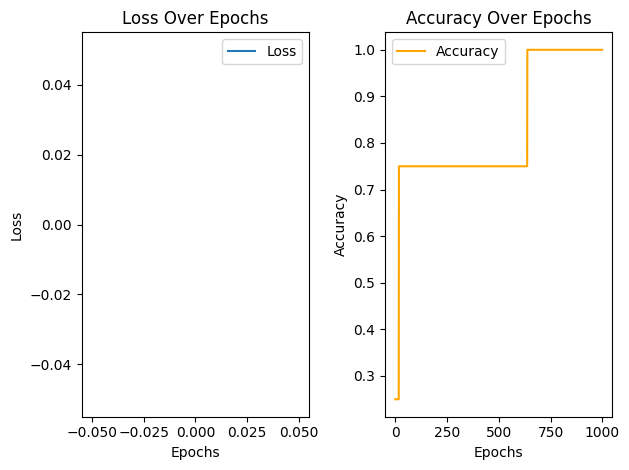

In [766]:
# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label='Accuracy', color='orange')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()